In [3]:
import argparse
import mne
import numpy as np
import pandas as pd
import os
import sys

In [4]:
# EEG data 파일 경로
file_path = "gdf_dataset/l1b.gdf"
# GDF EEG data
raw = mne.io.read_raw_gdf(file_path, preload=True)

Extracting EDF parameters from C:\Users\sakib\PycharmProjects\MindWaveWeb\gdf_dataset\l1b.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
#  1, #  2, #  3, #  4, #  5, #  6, #  7, #  8, #  9, # 10, # 11, # 12, # 13, # 14, # 15, # 16, # 17, # 18, # 19, # 20, # 21, # 22, # 23, # 24, # 25, # 26, # 27, # 28, # 29, # 30, # 31, # 32, # 33, # 34, # 35, # 36, # 37, # 38, # 39, # 40, # 41, # 42, # 43, # 44, # 45, # 46, # 47, # 48, # 49, # 50, # 51, # 52, # 53, # 54, # 55, # 56, # 57, # 58, # 59, # 60
Creating raw.info structure...
Reading 0 ... 633429  =      0.000 ...  2533.716 secs...


In [5]:
raw

<RawGDF | l1b.gdf, 60 x 633430 (2533.7 s), ~290.0 MiB, data loaded>

In [6]:
raw.ch_names

['#  1',
 '#  2',
 '#  3',
 '#  4',
 '#  5',
 '#  6',
 '#  7',
 '#  8',
 '#  9',
 '# 10',
 '# 11',
 '# 12',
 '# 13',
 '# 14',
 '# 15',
 '# 16',
 '# 17',
 '# 18',
 '# 19',
 '# 20',
 '# 21',
 '# 22',
 '# 23',
 '# 24',
 '# 25',
 '# 26',
 '# 27',
 '# 28',
 '# 29',
 '# 30',
 '# 31',
 '# 32',
 '# 33',
 '# 34',
 '# 35',
 '# 36',
 '# 37',
 '# 38',
 '# 39',
 '# 40',
 '# 41',
 '# 42',
 '# 43',
 '# 44',
 '# 45',
 '# 46',
 '# 47',
 '# 48',
 '# 49',
 '# 50',
 '# 51',
 '# 52',
 '# 53',
 '# 54',
 '# 55',
 '# 56',
 '# 57',
 '# 58',
 '# 59',
 '# 60']

Using matplotlib as 2D backend.


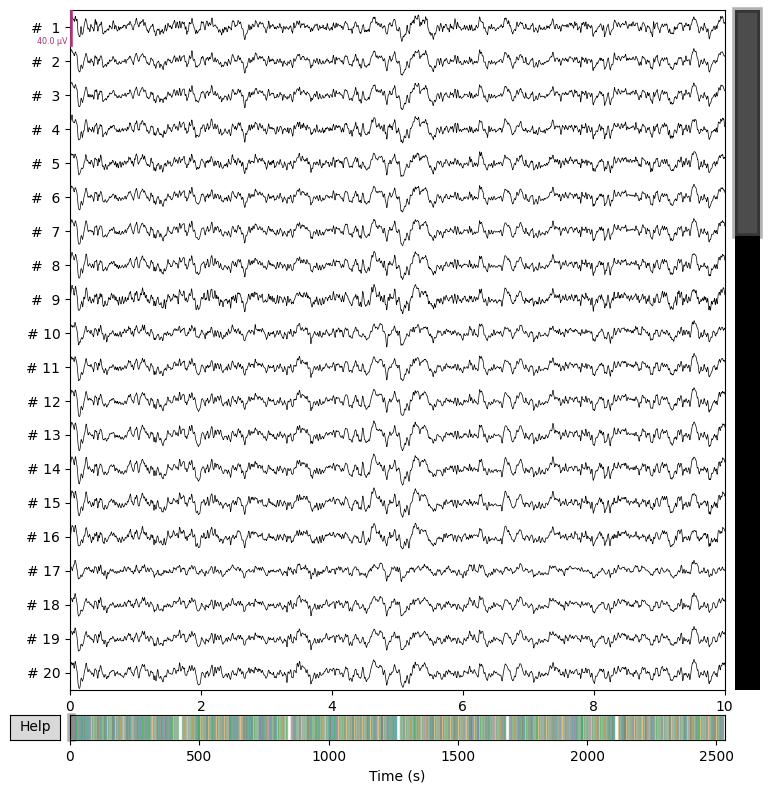

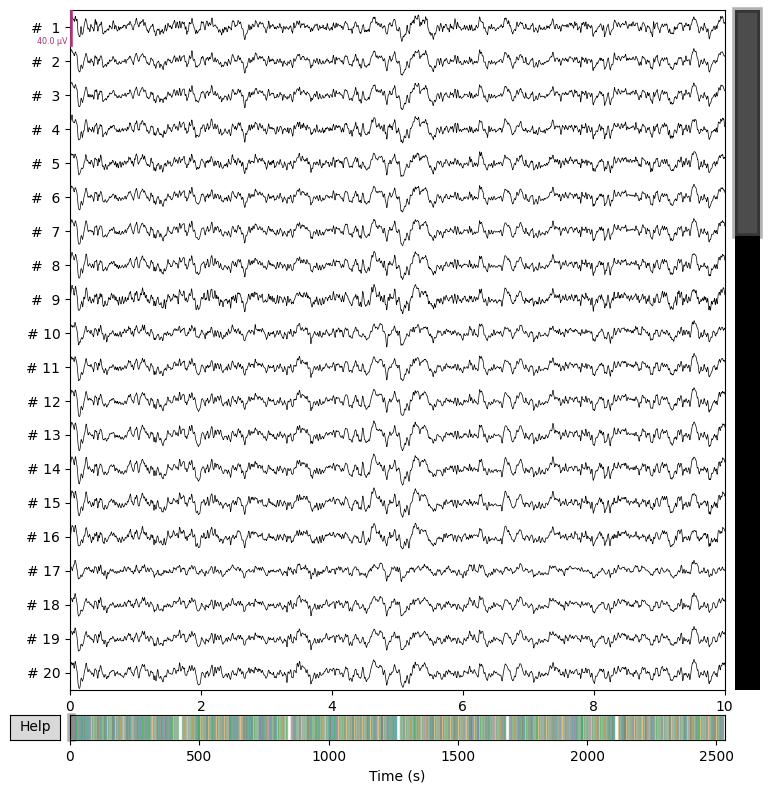

In [7]:
raw.plot()

In [8]:
# 데이터를 DataFrame으로 변환
raw_df = raw.to_data_frame()

raw_df.to_csv('eeg_data.csv', index=False)

In [9]:
raw_df.head(15)

,time,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,...,# 51,# 52,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60
0,0.000,7.756797,4.231847,6.245156,3.744097,5.122050,3.053669,3.575757,1.970708,0.651668,...,-1.401171,-2.132641,0.662897,1.432559,1.401885,0.913339,-1.813870,0.881953,1.841558,0.445080
1,0.004,9.249793,5.798911,8.259336,5.111928,5.821070,4.395660,4.905525,2.871704,0.437619,...,-2.829314,-3.686998,-0.314522,0.350991,-0.012904,-0.465742,-3.824667,-0.691089,-0.440112,-1.875884
2,0.008,10.805472,8.375131,11.032960,7.413984,7.351357,6.935729,6.887495,5.277934,2.803043,...,-3.390642,-4.299573,-1.111560,-0.532781,-1.145590,-1.431949,-4.758252,-2.077358,-2.118188,-3.327497
3,0.012,12.777139,11.193384,13.410353,9.124759,8.579366,9.382254,8.934685,7.902262,5.988384,...,-3.249355,-4.028706,-1.333891,-1.033585,-1.923510,-1.985284,-4.944124,-2.895007,-2.888733,-3.962325
4,0.016,14.845680,12.863004,14.223454,10.086577,9.063012,10.871756,10.467360,9.911626,8.763766,...,-2.626930,-3.253611,-1.296137,-1.345010,-2.462070,-2.402413,-4.297796,-3.085931,-3.244040,-3.865281
5,0.020,15.369938,13.096833,13.975809,11.399222,9.916950,11.853964,11.550741,11.520546,11.350495,...,-0.931488,-1.307539,-0.582998,-0.852622,-2.008995,-1.755437,-2.320793,-2.168669,-2.499180,-2.268102
6,0.024,14.036498,12.625073,13.558940,13.547545,10.540400,12.397236,12.358747,12.975726,13.599824,...,1.329101,1.205269,0.155310,0.077442,-0.876310,0.096106,0.125114,-0.844657,-0.855350,0.097340
7,0.028,12.834124,12.497903,14.120269,15.975741,10.442159,12.667074,13.043559,14.355822,15.410171,...,3.776800,3.909767,0.738406,1.226346,0.850502,2.556317,3.014579,0.790642,1.541901,2.749870
8,0.032,11.198666,11.480542,14.083122,16.338394,9.712912,11.958301,12.492810,14.573920,15.863665,...,6.075574,6.401740,1.212433,2.514128,2.914983,5.008016,5.735070,2.446694,3.994803,5.252790
9,0.036,10.457866,10.520613,13.344314,14.422642,9.168809,11.177572,11.434794,13.751583,14.934910,...,8.500361,8.877043,2.470913,4.496302,5.492377,7.523561,8.083816,4.405733,6.481951,7.432232


'FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4' 채널 매핑

In [10]:
# 채널 매핑 정의
channel_mapping = {
    10: 'FC3',
    13: 'FCz',
    16: 'FC4',
    28: 'C3',
    31: 'Cz',
    34: 'C4',
    46: 'CP3',
    49: 'CPz',
    52: 'CP4'
}
print(channel_mapping)

{10: 'FC3', 13: 'FCz', 16: 'FC4', 28: 'C3', 31: 'Cz', 34: 'C4', 46: 'CP3', 49: 'CPz', 52: 'CP4'}


In [11]:
# 채널 이름을 매핑된 채널 번호로 변환
def map_channel_names(raw, channel_mapping):
    # 기존 채널 번호를 가져옴
    original_channel_names = raw.info['ch_names']
    
    # 새로운 채널 이름 목록을 초기화
    new_channel_names = []
    
    for ch in range(len(original_channel_names)):
        if ch + 1 in channel_mapping:
            new_channel_names.append(channel_mapping[ch + 1])
        else:
            new_channel_names.append(original_channel_names[ch])
    
    # 채널 이름을 새로 설정
    raw.rename_channels(dict(zip(original_channel_names, new_channel_names)))

# 채널 이름 매핑 적용
map_channel_names(raw, channel_mapping)

In [12]:
raw.ch_names


['#  1',
 '#  2',
 '#  3',
 '#  4',
 '#  5',
 '#  6',
 '#  7',
 '#  8',
 '#  9',
 'FC3',
 '# 11',
 '# 12',
 'FCz',
 '# 14',
 '# 15',
 'FC4',
 '# 17',
 '# 18',
 '# 19',
 '# 20',
 '# 21',
 '# 22',
 '# 23',
 '# 24',
 '# 25',
 '# 26',
 '# 27',
 'C3',
 '# 29',
 '# 30',
 'Cz',
 '# 32',
 '# 33',
 'C4',
 '# 35',
 '# 36',
 '# 37',
 '# 38',
 '# 39',
 '# 40',
 '# 41',
 '# 42',
 '# 43',
 '# 44',
 '# 45',
 'CP3',
 '# 47',
 '# 48',
 'CPz',
 '# 50',
 '# 51',
 'CP4',
 '# 53',
 '# 54',
 '# 55',
 '# 56',
 '# 57',
 '# 58',
 '# 59',
 '# 60']

Based on the code context, the error is occurring because the `raw` object has been converted to a pandas DataFrame earlier in the notebook. You need to use the MNE Raw object to plot the PSD.

Here's the corrected code cell:



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\sakib\AppData\Local\Temp\ipykernel_18276\2093185488.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
C:\Users\sakib\PycharmProjects\MindWaveWeb\.venv2\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


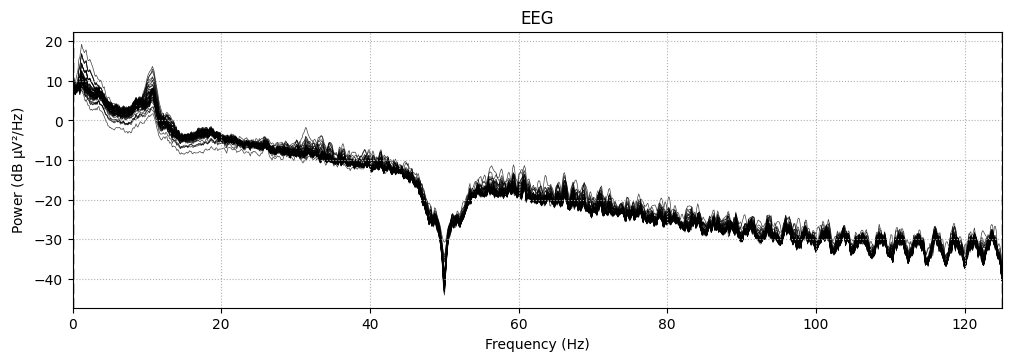

In [13]:
raw.plot_psd()

In [14]:
# 데이터를 DataFrame으로 변환
raw = raw.to_data_frame()
raw

,time,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,...,# 51,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60
0,0.000,7.756797,4.231847,6.245156,3.744097,5.122050,3.053669,3.575757,1.970708,0.651668,...,-1.401171,-2.132641,0.662897,1.432559,1.401885,0.913339,-1.813870,0.881953,1.841558,0.445080
1,0.004,9.249793,5.798911,8.259336,5.111928,5.821070,4.395660,4.905525,2.871704,0.437619,...,-2.829314,-3.686998,-0.314522,0.350991,-0.012904,-0.465742,-3.824667,-0.691089,-0.440112,-1.875884
2,0.008,10.805472,8.375131,11.032960,7.413984,7.351357,6.935729,6.887495,5.277934,2.803043,...,-3.390642,-4.299573,-1.111560,-0.532781,-1.145590,-1.431949,-4.758252,-2.077358,-2.118188,-3.327497
3,0.012,12.777139,11.193384,13.410353,9.124759,8.579366,9.382254,8.934685,7.902262,5.988384,...,-3.249355,-4.028706,-1.333891,-1.033585,-1.923510,-1.985284,-4.944124,-2.895007,-2.888733,-3.962325
4,0.016,14.845680,12.863004,14.223454,10.086577,9.063012,10.871756,10.467360,9.911626,8.763766,...,-2.626930,-3.253611,-1.296137,-1.345010,-2.462070,-2.402413,-4.297796,-3.085931,-3.244040,-3.865281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,2533.700,42.722540,40.692740,45.517532,43.474276,35.724013,39.557265,40.570114,42.054286,42.253378,...,42.504660,44.031355,41.479594,41.985067,43.144566,43.034883,46.280520,43.445393,42.308018,43.156471
633426,2533.704,58.837781,57.971462,63.546091,63.175778,52.810329,58.132868,59.197732,61.425691,61.731845,...,59.692010,61.558505,57.965681,59.071325,60.660592,60.154209,63.148408,60.101374,59.345626,59.997610
633427,2533.708,55.618152,54.541972,60.173991,60.124765,50.180503,55.736713,56.733857,58.543935,57.461747,...,56.652434,58.745660,56.119910,57.329032,58.707243,57.723793,58.793088,57.922359,57.402140,57.587689
633428,2533.712,36.363060,34.030669,38.880645,37.999009,31.034911,35.495314,35.740194,36.601832,34.674589,...,35.791627,37.701412,37.506993,38.247974,38.840360,37.416407,37.155893,38.373475,37.821733,37.766498


0-1 Scaling (MinMaxScaler)

In [15]:
from sklearn.preprocessing import MinMaxScaler


# time 컬럼을 제외한 나머지 데이터만 스케일링
features = raw.drop(columns=['time'])

# Min-Max 스케일러 초기화
scaler = MinMaxScaler()

# 스케일링 적용
scaled_features = scaler.fit_transform(features)

# 스케일링된 데이터를 DataFrame으로 변환하고 time 컬럼 추가
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['time'] = raw['time']

# 결과 확인
scaled_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,0.525750,...,0.540475,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,0.530205,...,0.534783,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,0.534813,...,0.532540,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,0.537377,...,0.533532,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,0.536736,...,0.536370,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,0.637812,...,0.709514,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,0.701411,...,0.773693,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,0.693233,...,0.763394,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,0.625299,...,0.686336,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


Large Laplacian Filter 적용

In [16]:
import mne
import numpy as np

# 10-20 시스템의 표준 전극 위치 파일 로드
montage = mne.channels.make_standard_montage('standard_1020')

# 60채널에 대한 모든 전극 위치 정보
all_positions = montage.get_positions()['ch_pos']

# 적용할 채널들
target_channels = ['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4']

# 각 채널의 위치 추출
channel_positions = {ch: all_positions[ch] for ch in target_channels}
channel_positions

{'FC3': array([-0.0601819,  0.0227162,  0.055544 ]),
 'FCz': array([0.0003761, 0.02739  , 0.088668 ]),
 'FC4': array([0.0622931, 0.0237228, 0.05563  ]),
 'C3': array([-0.0653581, -0.0116317,  0.064358 ]),
 'Cz': array([ 0.0004009, -0.009167 ,  0.100244 ]),
 'C4': array([ 0.0671179, -0.0109003,  0.06358  ]),
 'CP3': array([-0.0635562, -0.0470088,  0.065624 ]),
 'CPz': array([ 0.0003858, -0.047318 ,  0.099432 ]),
 'CP4': array([ 0.0666118, -0.0466372,  0.06558  ])}

In [17]:


def calculate_distance(pos1, pos2):
    return np.linalg.norm(np.array(pos1) - np.array(pos2))

def apply_large_laplacian_filter(scaled_df, target_channels, neighbor_dict, electrode_positions):
    filtered_df = scaled_df.copy()  # 함수 내부에서 결과를 저장할 데이터프레임

    for ch in target_channels:
        # 인접 채널 설정
        neighbors = neighbor_dict.get(ch, [])
        
        # 존재하는 인접 채널만 선택
        neighbors = [n for n in neighbors if n in scaled_df.columns and n in electrode_positions]
        
        if not neighbors:
            continue
        
        # 현재 채널과 인접 채널 데이터 추출
        ch_data = scaled_df[ch].values
        neighbor_data = scaled_df[neighbors].values
        
        # 거리 계산 및 가중치 설정
        distances = np.array([calculate_distance(electrode_positions[ch], electrode_positions[n]) for n in neighbors])
        weights = 1 / distances
        weights /= weights.sum()  # 정규화
        
        # 가중치를 사용하여 인접 채널 데이터의 가중합 계산
        weighted_avg_neighbor_data = np.sum(weights[:, np.newaxis] * neighbor_data.T, axis=0)
        
        # 라플라시안 필터 적용
        filtered_df[ch] = ch_data - weighted_avg_neighbor_data

    return filtered_df

# 10-20 시스템의 표준 전극 위치 파일 로드
montage = mne.channels.make_standard_montage('standard_1020')

# 적용할 채널 목록
target_channels = ['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4']

# 60채널에 대한 모든 전극 위치 정보
all_positions = montage.get_positions()['ch_pos']

# 각 채널의 위치 추출 (존재하는 채널만)
electrode_positions = {ch: all_positions[ch] for ch in target_channels if ch in all_positions}

# 각 채널의 인접 채널을 정의
neighbor_dict = {
    'FC3': ['FCz', 'C3'],
    'FCz': ['FC3', 'FC4', 'Cz'],
    'FC4': ['FCz', 'C4'],
    'C3': ['FC3', 'Cz', 'CP3'],
    'Cz': ['C3', 'C4', 'FCz', 'CPz'],
    'C4': ['FC4', 'Cz', 'CP4'],
    'CP3': ['C3', 'CPz'],
    'CPz': ['CP3', 'CP4', 'Cz'],
    'CP4': ['C4', 'CPz']
}

# 라플라시안 필터 적용
# scaled_df는 함수 호출 전에 준비된 데이터프레임이어야 합니다.
filtered_df = apply_large_laplacian_filter(scaled_df, target_channels, neighbor_dict, electrode_positions)

filtered_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.010435,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.007566,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.004562,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.002663,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.001851,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.006772,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.001367,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.002139,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.006689,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


In [18]:
# CSV 파일로 저장
csv_file_path = "laf_eeg_data.csv"
filtered_df.to_csv(csv_file_path, index=False)

print("CSV File path:", csv_file_path)

CSV File path: laf_eeg_data.csv


In [19]:
filtered_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.010435,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.007566,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.004562,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.002663,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.001851,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.006772,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.001367,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.002139,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.006689,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


HDR.TRIG / HDR.Classlabel 로드

In [20]:
# CSV 파일 읽기
eeg_d = pd.read_csv('laf_eeg_data.csv')
trig_df = pd.read_csv('csv_trig/k6b_HDR_TRIG.csv', header=None)
label_df = pd.read_csv('csv_Classlabels/k6b_HDR_Classlabel.csv', header=None)



In [21]:
eeg_d

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.010435,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.007566,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.004562,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.002663,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.001851,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.006772,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.001367,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.002139,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.006689,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


In [22]:
# 각 trial의 시작
trig_df

,0
0,2330
1,4891
2,7451
3,10011
4,12571
...,...
235,617738
236,620298
237,622858
238,625418


In [23]:
# trigger dataframe에 index 컬럼 이름 지정
trig_df.columns = ['index']

In [24]:
trig_df

,index
0,2330
1,4891
2,7451
3,10011
4,12571
...,...
235,617738
236,620298
237,622858
238,625418


In [25]:
# label의 값
label_df

,0
0,NaN
1,1.0
2,2.0
3,1.0
4,NaN
...,...
235,1.0
236,NaN
237,NaN
238,3.0


In [26]:
# label dataframe에 label 컬럼 이름 지정
label_df.columns = ['label']

In [27]:
label_df

,label
0,NaN
1,1.0
2,2.0
3,1.0
4,NaN
...,...
235,1.0
236,NaN
237,NaN
238,3.0


In [28]:
# eeg_d에 label column 추가
eeg_d['label'] = 0
eeg_d

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000,0
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004,0
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008,0
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012,0
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700,0
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704,0
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708,0
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712,0


trig_df, label_df를 통해 eeg_d에 label 값 정하기

In [29]:
# trigger 인덱스와 레이블 가져오기
trigger_indices = trig_df['index'].values
labels = label_df['label'].values

In [30]:
# 트리거 구간에 따라 레이블 지정
for i in range(len(trigger_indices) - 1):
    start_idx = trigger_indices[i]
    end_idx = trigger_indices[i + 1]
    label = labels[i]
    eeg_d.loc[start_idx:end_idx-1, 'label'] = label

In [31]:
# 마지막 트리거 이후 구간 레이블 지정
if len(trigger_indices) > 0:
    start_idx = trigger_indices[-1]
    label = labels[-1]
    eeg_d.loc[start_idx:, 'label'] = label

In [32]:
eeg_d[2500:3100]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
2500,0.478309,0.488808,0.493240,0.497185,0.542672,0.551492,0.544228,0.547021,0.546075,-0.053815,...,0.576394,0.586282,0.594415,0.594553,0.596307,0.576440,0.586627,0.584833,10.000,NaN
2501,0.477089,0.486610,0.492553,0.497047,0.538918,0.546975,0.540414,0.545098,0.544366,-0.053782,...,0.572351,0.582544,0.592981,0.593240,0.596277,0.574395,0.584170,0.584955,10.004,NaN
2502,0.474449,0.483650,0.492157,0.500511,0.534020,0.543771,0.538643,0.545953,0.548333,-0.054592,...,0.571115,0.580941,0.592065,0.593729,0.595727,0.573571,0.583834,0.586358,10.008,NaN
2503,0.472313,0.480507,0.491211,0.503349,0.526772,0.541146,0.537285,0.546258,0.552621,-0.056596,...,0.571176,0.579644,0.589670,0.593240,0.592554,0.572274,0.583071,0.585794,10.012,NaN
2504,0.471244,0.478233,0.488662,0.503670,0.520958,0.538537,0.536919,0.546349,0.553063,-0.059430,...,0.573251,0.579263,0.587533,0.591913,0.590753,0.572488,0.583254,0.584619,10.016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,0.438437,0.449348,0.454146,0.462623,0.512657,0.518425,0.511604,0.511299,0.510170,-0.045894,...,0.555123,0.556420,0.554482,0.561379,0.563668,0.543297,0.549944,0.546349,12.380,NaN
3096,0.423529,0.437888,0.441725,0.451560,0.505013,0.509865,0.502037,0.504768,0.507744,-0.048503,...,0.557443,0.557305,0.554192,0.559014,0.560586,0.544732,0.549135,0.544106,12.384,NaN
3097,0.414008,0.432486,0.437071,0.449210,0.501488,0.507973,0.500114,0.505882,0.509285,-0.052031,...,0.560052,0.559304,0.555627,0.558816,0.559884,0.548363,0.551424,0.545403,12.388,NaN
3098,0.410803,0.433478,0.439192,0.450889,0.501305,0.513329,0.505791,0.512398,0.512444,-0.054858,...,0.565957,0.565103,0.561639,0.563638,0.563348,0.555901,0.559343,0.552911,12.392,NaN


In [33]:
eeg_d[4945:5045]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
4945,0.465293,0.477119,0.484863,0.490654,0.528206,0.533745,0.528695,0.520760,0.521340,-0.028429,...,0.541253,0.547829,0.549294,0.548058,0.540230,0.534752,0.546785,0.537148,19.780,1.0
4946,0.469184,0.482246,0.488144,0.493339,0.536980,0.540200,0.533379,0.525185,0.523064,-0.030010,...,0.547417,0.554009,0.554086,0.554177,0.546029,0.539803,0.551164,0.541115,19.784,1.0
4947,0.469612,0.481636,0.486770,0.491279,0.540352,0.542519,0.534630,0.526833,0.523308,-0.032581,...,0.553735,0.559960,0.558419,0.559594,0.548775,0.544671,0.555376,0.544198,19.788,1.0
4948,0.470634,0.481910,0.488189,0.494026,0.543511,0.546304,0.538796,0.532143,0.527901,-0.034989,...,0.562661,0.567376,0.564492,0.564950,0.551461,0.551507,0.560335,0.548028,19.792,1.0
4949,0.472374,0.484627,0.492462,0.499840,0.547265,0.552300,0.544579,0.538949,0.534737,-0.035412,...,0.570275,0.573205,0.568795,0.568490,0.553841,0.557366,0.562578,0.550164,19.796,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,0.537713,0.516335,0.523148,0.539132,0.536065,0.541695,0.534127,0.543236,0.546899,-0.057713,...,0.575891,0.576898,0.574258,0.570336,0.569589,0.571191,0.577898,0.567163,20.160,1.0
5041,0.532952,0.514153,0.522355,0.536873,0.537407,0.543923,0.537102,0.544991,0.546441,-0.060166,...,0.580819,0.581521,0.579599,0.576104,0.574350,0.576974,0.583316,0.572229,20.164,1.0
5042,0.525002,0.508659,0.519135,0.530114,0.538170,0.543816,0.536919,0.542016,0.543191,-0.055691,...,0.579721,0.581323,0.581277,0.580026,0.577768,0.577447,0.585253,0.574624,20.168,1.0
5043,0.515648,0.501549,0.513276,0.520500,0.533974,0.540200,0.532143,0.536019,0.538857,-0.050751,...,0.575692,0.578790,0.580804,0.582727,0.579004,0.576089,0.585665,0.575189,20.172,1.0


In [34]:
# 각 레이블의 개수 출력
print(eeg_d['label'].value_counts())

label
1.0    79690
2.0    79318
4.0    76805
3.0    76803
0.0     2330
Name: count, dtype: int64


In [35]:
eeg_d

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000,0.0
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004,0.0
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008,0.0
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012,0.0
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700,NaN
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704,NaN
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708,NaN
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712,NaN


epoch로 자르기 (rest : 1~2s / label : 3~7s 값들만)

In [36]:
# label이 0인 eeg_d 행 출력
eeg_d[eeg_d['label'] == 0]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000,0.0
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004,0.0
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008,0.0
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012,0.0
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,0.474525,0.483833,0.491516,0.505898,0.531792,0.543282,0.533577,0.548425,0.563897,-0.045559,...,0.549111,0.546532,0.544991,0.548028,0.548486,0.541009,0.548128,0.540764,9.300,0.0
2326,0.475257,0.483314,0.487701,0.497261,0.527962,0.540581,0.529931,0.542306,0.562387,-0.042623,...,0.538125,0.536324,0.535973,0.538750,0.540459,0.529580,0.537263,0.531624,9.304,0.0
2327,0.474540,0.480278,0.483474,0.492378,0.524620,0.537163,0.524788,0.534463,0.548516,-0.040721,...,0.529488,0.528298,0.528023,0.531533,0.532677,0.519417,0.528321,0.523217,9.308,0.0
2328,0.475975,0.477943,0.482803,0.494118,0.522576,0.535760,0.522911,0.530297,0.535393,-0.040000,...,0.525628,0.525048,0.524193,0.529046,0.529824,0.514366,0.525163,0.520012,9.312,0.0


In [37]:
# 샘플링 주파수
fs = 250
start_offset = 3 * fs
end_offset = 7 * fs

# Epochs를 저장할 리스트 초기화
epochs = []

trigger_indices = trig_df['index'].values.astype(int)  # 정수로 변환
labels = label_df['label'].values

# Epoch 추출
for idx, label in zip(trigger_indices, labels):
    start_idx = int(idx + start_offset)  # 정수로 변환
    end_idx = int(idx + end_offset)  # 정수로 변환
    
    if end_idx <= len(eeg_d):
        epoch = eeg_d.iloc[start_idx:end_idx].copy()
        epoch['label'] = label
        epochs.append(epoch)

# epochs 리스트를 단일 DataFrame으로 결합
epochs_df = pd.concat(epochs, ignore_index=True)

In [38]:
epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.622400,0.616663,0.623829,0.634241,0.639017,0.642832,0.630854,0.633249,0.640116,-0.007607,...,0.544289,0.552972,0.555734,0.559564,0.556405,0.535683,0.553926,0.552285,12.320,NaN
1,0.631083,0.624811,0.633305,0.643839,0.642451,0.650813,0.639261,0.641947,0.641657,-0.010846,...,0.548119,0.556695,0.559655,0.564446,0.561425,0.540093,0.558901,0.556970,12.324,NaN
2,0.634668,0.626215,0.638554,0.648814,0.637186,0.652033,0.643168,0.646738,0.640925,-0.015698,...,0.550332,0.558389,0.561425,0.567529,0.564004,0.542489,0.561251,0.558755,12.328,NaN
3,0.629786,0.620294,0.635899,0.646403,0.629603,0.646906,0.640726,0.646113,0.639826,-0.018796,...,0.546517,0.553948,0.557443,0.564355,0.560601,0.538781,0.556734,0.553185,12.332,NaN
4,0.623514,0.613443,0.631626,0.642344,0.625437,0.643076,0.638117,0.645640,0.640925,-0.018194,...,0.539681,0.546777,0.550423,0.557443,0.554147,0.531456,0.548830,0.544732,12.336,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,0.478080,0.487205,0.492553,0.508019,0.544976,0.548608,0.537026,0.547204,0.549538,-0.032236,...,0.568353,0.573220,0.571054,0.566400,0.549172,0.567758,0.578249,0.554543,2518.892,NaN
239996,0.485069,0.498466,0.503937,0.517571,0.555550,0.561776,0.548653,0.556939,0.559670,-0.028264,...,0.564828,0.573114,0.575204,0.573831,0.558663,0.563500,0.576312,0.555505,2518.896,NaN
239997,0.482902,0.497185,0.500992,0.511360,0.552804,0.559060,0.546365,0.551080,0.554711,-0.022849,...,0.547494,0.558175,0.564019,0.565560,0.553491,0.544884,0.560488,0.541802,2518.900,NaN
239998,0.480018,0.492164,0.496429,0.504906,0.543420,0.550942,0.541558,0.543771,0.547814,-0.019904,...,0.528283,0.539467,0.546929,0.550942,0.541848,0.522301,0.539186,0.522728,2518.904,NaN


In [39]:
epochs[0]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
3080,0.622400,0.616663,0.623829,0.634241,0.639017,0.642832,0.630854,0.633249,0.640116,-0.007607,...,0.544289,0.552972,0.555734,0.559564,0.556405,0.535683,0.553926,0.552285,12.320,NaN
3081,0.631083,0.624811,0.633305,0.643839,0.642451,0.650813,0.639261,0.641947,0.641657,-0.010846,...,0.548119,0.556695,0.559655,0.564446,0.561425,0.540093,0.558901,0.556970,12.324,NaN
3082,0.634668,0.626215,0.638554,0.648814,0.637186,0.652033,0.643168,0.646738,0.640925,-0.015698,...,0.550332,0.558389,0.561425,0.567529,0.564004,0.542489,0.561251,0.558755,12.328,NaN
3083,0.629786,0.620294,0.635899,0.646403,0.629603,0.646906,0.640726,0.646113,0.639826,-0.018796,...,0.546517,0.553948,0.557443,0.564355,0.560601,0.538781,0.556734,0.553185,12.332,NaN
3084,0.623514,0.613443,0.631626,0.642344,0.625437,0.643076,0.638117,0.645640,0.640925,-0.018194,...,0.539681,0.546777,0.550423,0.557443,0.554147,0.531456,0.548830,0.544732,12.336,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,0.468009,0.480278,0.484741,0.494926,0.532341,0.544152,0.538781,0.539284,0.545892,-0.041891,...,0.564096,0.574655,0.579202,0.575433,0.572793,0.565026,0.576922,0.569955,16.300,NaN
4076,0.472663,0.488243,0.495361,0.500374,0.541207,0.553017,0.546944,0.546471,0.551919,-0.042441,...,0.572473,0.580987,0.583124,0.579126,0.573159,0.572824,0.581988,0.571450,16.304,NaN
4077,0.477928,0.498024,0.505371,0.510262,0.553185,0.563821,0.556100,0.554498,0.556023,-0.043950,...,0.582345,0.588602,0.588418,0.584573,0.575189,0.581765,0.589038,0.575067,16.308,NaN
4078,0.480354,0.503120,0.510178,0.518624,0.562036,0.570047,0.560861,0.559960,0.559701,-0.046329,...,0.589456,0.593912,0.592126,0.588388,0.577600,0.587030,0.594028,0.578637,16.312,NaN


In [40]:
epochs[37]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
97804,0.466499,0.470420,0.471847,0.490806,0.526238,0.527504,0.515282,0.522042,0.521736,-0.031679,...,0.544274,0.553170,0.559274,0.562737,0.558602,0.540688,0.561098,0.553628,391.216,1.0
97805,0.464622,0.470512,0.474624,0.495933,0.525765,0.528298,0.517922,0.524743,0.527138,-0.032227,...,0.544381,0.552483,0.558267,0.561166,0.560098,0.538430,0.556017,0.551659,391.220,1.0
97806,0.468818,0.473960,0.479873,0.496742,0.525383,0.531701,0.521935,0.527642,0.529702,-0.036415,...,0.548180,0.555779,0.561181,0.562020,0.564340,0.538918,0.554445,0.553048,391.224,1.0
97807,0.475242,0.479118,0.484176,0.492592,0.527245,0.535836,0.524941,0.528908,0.527611,-0.042143,...,0.551080,0.558129,0.562097,0.562081,0.566445,0.537865,0.552644,0.553964,391.228,1.0
97808,0.477165,0.483574,0.487045,0.490455,0.529595,0.539681,0.529061,0.531548,0.529305,-0.046398,...,0.550149,0.556603,0.558923,0.560052,0.565499,0.534295,0.548891,0.551888,391.232,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98799,0.465080,0.475868,0.481033,0.503975,0.529763,0.541466,0.524895,0.544381,0.548394,-0.030284,...,0.545693,0.545373,0.540902,0.544137,0.541558,0.529580,0.535295,0.532082,395.196,1.0
98800,0.466026,0.473915,0.479873,0.506233,0.529397,0.538659,0.523842,0.543374,0.550011,-0.034466,...,0.545357,0.544228,0.540383,0.542657,0.540795,0.529625,0.535295,0.531441,395.200,1.0
98801,0.473106,0.477226,0.483261,0.505821,0.531441,0.540398,0.524697,0.539101,0.543557,-0.033818,...,0.541985,0.540154,0.537606,0.540291,0.540307,0.526528,0.533097,0.529946,395.204,1.0
98802,0.477180,0.481727,0.485626,0.500938,0.533303,0.543038,0.525200,0.534051,0.533349,-0.029245,...,0.537758,0.536370,0.534691,0.538125,0.542260,0.523232,0.531205,0.529900,395.208,1.0


In [41]:
len(epochs)

240

rest 상태 epoch 추출

In [42]:
# 샘플링 주파수
fs = 250
start_offset = 1 * fs
end_offset = 2 * fs

# Epochs를 저장할 리스트 초기화
rest_epochs = []

trigger_indices = trig_df['index'].values.astype(int)  # 정수로 변환
labels = label_df['label'].values

# Epoch 추출
for idx, label in zip(trigger_indices, labels):
    start_idx = int(idx + start_offset)  # 정수로 변환
    end_idx = int(idx + end_offset)  # 정수로 변환
    
    if end_idx <= len(eeg_d):
        epoch = eeg_d.iloc[start_idx:end_idx].copy()
        epoch['label'] = label
        rest_epochs.append(epoch)

# rest_epochs 리스트를 단일 DataFrame으로 결합
rest_epochs_df = pd.concat(rest_epochs, ignore_index=True)

In [43]:
rest_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.442649,0.432349,0.435972,0.451194,0.485161,0.479789,0.466743,0.469306,0.478599,-0.032409,...,0.528511,0.525322,0.518563,0.520531,0.523171,0.525887,0.533708,0.526375,10.320,NaN
1,0.441199,0.432013,0.435362,0.447837,0.488991,0.480232,0.468513,0.470222,0.484855,-0.032512,...,0.528023,0.526329,0.520790,0.523552,0.527337,0.526040,0.534562,0.527565,10.324,NaN
2,0.440330,0.430396,0.434355,0.443656,0.487602,0.479744,0.469047,0.471733,0.490288,-0.034673,...,0.530037,0.529915,0.524804,0.527855,0.530587,0.527413,0.536683,0.529320,10.328,NaN
3,0.438651,0.427390,0.432905,0.442573,0.482170,0.476814,0.466926,0.470420,0.488670,-0.037598,...,0.532464,0.533989,0.529137,0.531167,0.532235,0.529244,0.539613,0.530587,10.332,NaN
4,0.436728,0.427604,0.434309,0.445563,0.478996,0.475700,0.466819,0.471778,0.486915,-0.037666,...,0.534264,0.536614,0.532494,0.533349,0.532433,0.530709,0.542634,0.531563,10.336,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.453544,0.455955,0.459700,0.474296,0.512932,0.516121,0.505562,0.509117,0.514366,-0.028655,...,0.542412,0.545357,0.547463,0.551202,0.551766,0.536065,0.548051,0.545510,2513.892,NaN
59996,0.451987,0.450965,0.455596,0.471580,0.506874,0.509422,0.500343,0.504036,0.505364,-0.032001,...,0.534020,0.534157,0.533684,0.535348,0.535943,0.523323,0.532289,0.528649,2513.896,NaN
59997,0.449744,0.446021,0.452116,0.468086,0.502647,0.503426,0.494957,0.499229,0.498177,-0.035172,...,0.529397,0.525658,0.523339,0.522759,0.524117,0.514549,0.520844,0.516243,2513.900,NaN
59998,0.449714,0.445945,0.454283,0.468956,0.502663,0.502632,0.495583,0.499489,0.500587,-0.036083,...,0.530480,0.523919,0.520073,0.517769,0.520882,0.513725,0.518693,0.513237,2513.904,NaN


NaN 값을 가진 epoch 제거

In [44]:
# NaN 값을 가진 행을 제거
label_epochs_df = epochs_df.dropna(subset=['label'])
rest_epochs_df = rest_epochs_df.dropna(subset=['label'])

In [45]:
# NaN 값을 가진 항목을 제거하여 rest_epochs 리스트를 업데이트
rest_epochs = [epoch for epoch in rest_epochs if not epoch['label'].isnull().any()]

# NaN 값을 가진 항목을 제거하여 epochs 리스트를 업데이트
epochs = [epoch for epoch in epochs if not epoch['label'].isnull().any()]

In [46]:
label_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
1000,0.463111,0.467430,0.470382,0.482948,0.515526,0.522026,0.513512,0.515999,0.517144,-0.034019,...,0.553552,0.557900,0.556634,0.559472,0.557122,0.549310,0.558321,0.552682,22.564,1.0
1001,0.458808,0.462028,0.466811,0.478874,0.514290,0.518151,0.509529,0.512734,0.515999,-0.035644,...,0.553979,0.556268,0.553979,0.553872,0.550805,0.548913,0.555574,0.547631,22.568,1.0
1002,0.457710,0.461219,0.468429,0.478004,0.515892,0.517372,0.507652,0.513436,0.516777,-0.038191,...,0.558907,0.560632,0.557916,0.554864,0.550286,0.554696,0.560625,0.549966,22.572,1.0
1003,0.459312,0.466285,0.474624,0.483253,0.519524,0.521828,0.510628,0.518135,0.521141,-0.038826,...,0.561639,0.564721,0.562631,0.558846,0.554284,0.559380,0.566912,0.556176,22.576,1.0
1004,0.464530,0.476081,0.484680,0.494118,0.527596,0.530922,0.520455,0.529442,0.534600,-0.036302,...,0.562875,0.567636,0.566674,0.565316,0.561776,0.562356,0.572283,0.563897,22.580,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238995,0.514229,0.509224,0.514145,0.522011,0.552117,0.553979,0.539208,0.543709,0.544350,-0.019807,...,0.531731,0.532937,0.533059,0.531518,0.522332,0.516014,0.526872,0.515129,2508.652,3.0
238996,0.504646,0.499550,0.503235,0.508873,0.543465,0.544106,0.528923,0.532769,0.534295,-0.020977,...,0.528878,0.531365,0.532448,0.528771,0.520577,0.513497,0.525468,0.514702,2508.656,3.0
238997,0.506661,0.505074,0.509064,0.514519,0.547051,0.551080,0.535668,0.538918,0.540688,-0.024759,...,0.537011,0.541283,0.543557,0.538735,0.534356,0.523552,0.536409,0.527779,2508.660,3.0
238998,0.515618,0.518181,0.524674,0.532479,0.554284,0.566384,0.551598,0.555932,0.559121,-0.030122,...,0.550835,0.556710,0.559579,0.554726,0.553338,0.538964,0.551897,0.544854,2508.664,3.0


In [47]:
rest_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
250,0.552178,0.557336,0.572848,0.579797,0.592889,0.603586,0.590692,0.597971,0.594598,-0.018068,...,0.538415,0.543542,0.546349,0.552148,0.548806,0.528603,0.541719,0.537453,20.564,1.0
251,0.554757,0.563088,0.578906,0.589487,0.602518,0.611933,0.598764,0.607172,0.610498,-0.016800,...,0.542092,0.546395,0.550378,0.555428,0.553887,0.531487,0.543733,0.540307,20.568,1.0
252,0.556497,0.568276,0.583483,0.596643,0.611078,0.619318,0.606348,0.614359,0.618387,-0.019860,...,0.552087,0.555093,0.558618,0.561669,0.561318,0.539330,0.550371,0.546395,20.572,1.0
253,0.553689,0.566415,0.579760,0.591379,0.609995,0.618357,0.603983,0.609430,0.609720,-0.021442,...,0.555596,0.558190,0.560952,0.562066,0.561273,0.541588,0.552416,0.546868,20.576,1.0
254,0.549599,0.559625,0.571551,0.579629,0.602075,0.610513,0.596399,0.599329,0.595987,-0.021000,...,0.552178,0.555474,0.557198,0.556847,0.556466,0.537865,0.549272,0.542458,20.580,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59745,0.474525,0.485451,0.492950,0.504524,0.539773,0.543587,0.532601,0.540719,0.546441,-0.040979,...,0.560967,0.564767,0.566308,0.562325,0.553460,0.551461,0.564653,0.552026,2503.652,3.0
59746,0.476799,0.488746,0.496017,0.506798,0.543023,0.547082,0.536919,0.545174,0.553170,-0.037531,...,0.552911,0.558343,0.561639,0.558709,0.549233,0.544762,0.559664,0.546685,2503.656,3.0
59747,0.477790,0.489906,0.497162,0.506081,0.543236,0.548150,0.539315,0.546914,0.553353,-0.036069,...,0.547738,0.555474,0.559472,0.557275,0.547295,0.542672,0.558489,0.545510,2503.660,3.0
59748,0.473793,0.482750,0.490310,0.498177,0.534112,0.540017,0.531624,0.538247,0.539574,-0.036715,...,0.541833,0.550286,0.553338,0.551690,0.541024,0.539849,0.554567,0.541924,2503.664,3.0


In [48]:
# rest 상태일 때 label 컬럼의 모든 값을 '5'로 변경
rest_epochs_df['label'] = '5'
rest_epochs_df

C:\Users\sakib\AppData\Local\Temp\ipykernel_18276\1067289374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_epochs_df['label'] = '5'


,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
250,0.552178,0.557336,0.572848,0.579797,0.592889,0.603586,0.590692,0.597971,0.594598,-0.018068,...,0.538415,0.543542,0.546349,0.552148,0.548806,0.528603,0.541719,0.537453,20.564,5
251,0.554757,0.563088,0.578906,0.589487,0.602518,0.611933,0.598764,0.607172,0.610498,-0.016800,...,0.542092,0.546395,0.550378,0.555428,0.553887,0.531487,0.543733,0.540307,20.568,5
252,0.556497,0.568276,0.583483,0.596643,0.611078,0.619318,0.606348,0.614359,0.618387,-0.019860,...,0.552087,0.555093,0.558618,0.561669,0.561318,0.539330,0.550371,0.546395,20.572,5
253,0.553689,0.566415,0.579760,0.591379,0.609995,0.618357,0.603983,0.609430,0.609720,-0.021442,...,0.555596,0.558190,0.560952,0.562066,0.561273,0.541588,0.552416,0.546868,20.576,5
254,0.549599,0.559625,0.571551,0.579629,0.602075,0.610513,0.596399,0.599329,0.595987,-0.021000,...,0.552178,0.555474,0.557198,0.556847,0.556466,0.537865,0.549272,0.542458,20.580,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59745,0.474525,0.485451,0.492950,0.504524,0.539773,0.543587,0.532601,0.540719,0.546441,-0.040979,...,0.560967,0.564767,0.566308,0.562325,0.553460,0.551461,0.564653,0.552026,2503.652,5
59746,0.476799,0.488746,0.496017,0.506798,0.543023,0.547082,0.536919,0.545174,0.553170,-0.037531,...,0.552911,0.558343,0.561639,0.558709,0.549233,0.544762,0.559664,0.546685,2503.656,5
59747,0.477790,0.489906,0.497162,0.506081,0.543236,0.548150,0.539315,0.546914,0.553353,-0.036069,...,0.547738,0.555474,0.559472,0.557275,0.547295,0.542672,0.558489,0.545510,2503.660,5
59748,0.473793,0.482750,0.490310,0.498177,0.534112,0.540017,0.531624,0.538247,0.539574,-0.036715,...,0.541833,0.550286,0.553338,0.551690,0.541024,0.539849,0.554567,0.541924,2503.664,5


label_epochs_df에서 time 열 제거하기

In [49]:
# 'time' 열 제거
label_epochs_df = label_epochs_df.drop(columns=['time'])
label_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
1000,0.463111,0.467430,0.470382,0.482948,0.515526,0.522026,0.513512,0.515999,0.517144,-0.034019,...,0.015741,0.553552,0.557900,0.556634,0.559472,0.557122,0.549310,0.558321,0.552682,1.0
1001,0.458808,0.462028,0.466811,0.478874,0.514290,0.518151,0.509529,0.512734,0.515999,-0.035644,...,0.015211,0.553979,0.556268,0.553979,0.553872,0.550805,0.548913,0.555574,0.547631,1.0
1002,0.457710,0.461219,0.468429,0.478004,0.515892,0.517372,0.507652,0.513436,0.516777,-0.038191,...,0.015546,0.558907,0.560632,0.557916,0.554864,0.550286,0.554696,0.560625,0.549966,1.0
1003,0.459312,0.466285,0.474624,0.483253,0.519524,0.521828,0.510628,0.518135,0.521141,-0.038826,...,0.017383,0.561639,0.564721,0.562631,0.558846,0.554284,0.559380,0.566912,0.556176,1.0
1004,0.464530,0.476081,0.484680,0.494118,0.527596,0.530922,0.520455,0.529442,0.534600,-0.036302,...,0.020066,0.562875,0.567636,0.566674,0.565316,0.561776,0.562356,0.572283,0.563897,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238995,0.514229,0.509224,0.514145,0.522011,0.552117,0.553979,0.539208,0.543709,0.544350,-0.019807,...,0.006792,0.531731,0.532937,0.533059,0.531518,0.522332,0.516014,0.526872,0.515129,3.0
238996,0.504646,0.499550,0.503235,0.508873,0.543465,0.544106,0.528923,0.532769,0.534295,-0.020977,...,0.007379,0.528878,0.531365,0.532448,0.528771,0.520577,0.513497,0.525468,0.514702,3.0
238997,0.506661,0.505074,0.509064,0.514519,0.547051,0.551080,0.535668,0.538918,0.540688,-0.024759,...,0.007600,0.537011,0.541283,0.543557,0.538735,0.534356,0.523552,0.536409,0.527779,3.0
238998,0.515618,0.518181,0.524674,0.532479,0.554284,0.566384,0.551598,0.555932,0.559121,-0.030122,...,0.007289,0.550835,0.556710,0.559579,0.554726,0.553338,0.538964,0.551897,0.544854,3.0


In [50]:
# CSV 파일로 저장
csv_file_path = "laf_eeg_data_label_360000.csv"
label_epochs_df.to_csv(csv_file_path, index=False)

print("CSV 파일이 저장되었습니다:", csv_file_path)

CSV 파일이 저장되었습니다: laf_eeg_data_label_360000.csv


In [51]:
# CSV 파일 불러오기
csv_file_path = "laf_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기+++++++++++))))))))))))))KKKKKKKKKKKKKKKKK
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.034019,0.016278,-0.028007,0.002197,0.021475,-0.006325,-0.003940,-0.003071,0.015741,1.0
1,-0.035644,0.015156,-0.026574,0.004852,0.022710,-0.008918,-0.003681,-0.003478,0.015211,1.0
2,-0.038191,0.015246,-0.026681,0.006779,0.023517,-0.011763,-0.002960,-0.002317,0.015546,1.0
3,-0.038826,0.017709,-0.026956,0.006449,0.023407,-0.014567,-0.003156,-0.001180,0.017383,1.0
4,-0.036302,0.020414,-0.024884,0.004501,0.022204,-0.016970,-0.004556,-0.001158,0.020066,1.0
...,...,...,...,...,...,...,...,...,...,...
119995,-0.019807,0.018875,-0.011875,0.008114,0.022366,-0.017135,-0.014002,-0.009915,0.006792,3.0
119996,-0.020977,0.018691,-0.016626,0.010030,0.022204,-0.015912,-0.016301,-0.007534,0.007379,3.0
119997,-0.024759,0.020774,-0.020563,0.009569,0.022386,-0.013214,-0.017813,-0.005700,0.007600,3.0
119998,-0.030122,0.022237,-0.019904,0.008006,0.023747,-0.012223,-0.016870,-0.005223,0.007289,3.0


In [52]:
# CSV 파일로 저장
csv_file_path = "laf_eeg_data_9ch_360000.csv"
df.to_csv(csv_file_path, index=False)

print("CSV 파일이 저장되었습니다:", csv_file_path)

CSV 파일이 저장되었습니다: laf_eeg_data_9ch_360000.csv


In [53]:
# Load the CSV file
csv_file_path = "laf_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 1
df_label_1 = df[df['label'] == 1]
df_label_1

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
0,0.463111,0.467430,0.470382,0.482948,0.515526,0.522026,0.513512,0.515999,0.517144,-0.034019,...,0.015741,0.553552,0.557900,0.556634,0.559472,0.557122,0.549310,0.558321,0.552682,1.0
1,0.458808,0.462028,0.466811,0.478874,0.514290,0.518151,0.509529,0.512734,0.515999,-0.035644,...,0.015211,0.553979,0.556268,0.553979,0.553872,0.550805,0.548913,0.555574,0.547631,1.0
2,0.457710,0.461219,0.468429,0.478004,0.515892,0.517372,0.507652,0.513436,0.516777,-0.038191,...,0.015546,0.558907,0.560632,0.557916,0.554864,0.550286,0.554696,0.560625,0.549966,1.0
3,0.459312,0.466285,0.474624,0.483253,0.519524,0.521828,0.510628,0.518135,0.521141,-0.038826,...,0.017383,0.561639,0.564721,0.562631,0.558846,0.554284,0.559380,0.566912,0.556176,1.0
4,0.464530,0.476081,0.484680,0.494118,0.527596,0.530922,0.520455,0.529442,0.534600,-0.036302,...,0.020066,0.562875,0.567636,0.566674,0.565316,0.561776,0.562356,0.572283,0.563897,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118995,0.481392,0.489647,0.499039,0.509606,0.541924,0.554803,0.548333,0.549081,0.548791,-0.040420,...,0.020348,0.586587,0.590753,0.592950,0.589914,0.587335,0.585168,0.593844,0.588724,1.0
118996,0.473152,0.476921,0.486709,0.496651,0.526101,0.538323,0.532815,0.533730,0.536248,-0.040043,...,0.021584,0.573556,0.577783,0.580194,0.578363,0.577920,0.572717,0.582003,0.577371,1.0
118997,0.465782,0.468193,0.477126,0.488045,0.515602,0.526238,0.520836,0.525475,0.532280,-0.040905,...,0.021040,0.563607,0.568933,0.572152,0.572091,0.572763,0.562997,0.572893,0.569314,1.0
118998,0.462287,0.463951,0.472304,0.487739,0.510735,0.521202,0.515312,0.526436,0.536416,-0.042561,...,0.018457,0.554040,0.562051,0.566522,0.568795,0.569665,0.553826,0.565493,0.563409,1.0


In [54]:
# Reset the index of the filtered dataframe
df_label_1 = df_label_1.reset_index(drop=True)
df_label_1

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
0,0.463111,0.467430,0.470382,0.482948,0.515526,0.522026,0.513512,0.515999,0.517144,-0.034019,...,0.015741,0.553552,0.557900,0.556634,0.559472,0.557122,0.549310,0.558321,0.552682,1.0
1,0.458808,0.462028,0.466811,0.478874,0.514290,0.518151,0.509529,0.512734,0.515999,-0.035644,...,0.015211,0.553979,0.556268,0.553979,0.553872,0.550805,0.548913,0.555574,0.547631,1.0
2,0.457710,0.461219,0.468429,0.478004,0.515892,0.517372,0.507652,0.513436,0.516777,-0.038191,...,0.015546,0.558907,0.560632,0.557916,0.554864,0.550286,0.554696,0.560625,0.549966,1.0
3,0.459312,0.466285,0.474624,0.483253,0.519524,0.521828,0.510628,0.518135,0.521141,-0.038826,...,0.017383,0.561639,0.564721,0.562631,0.558846,0.554284,0.559380,0.566912,0.556176,1.0
4,0.464530,0.476081,0.484680,0.494118,0.527596,0.530922,0.520455,0.529442,0.534600,-0.036302,...,0.020066,0.562875,0.567636,0.566674,0.565316,0.561776,0.562356,0.572283,0.563897,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.481392,0.489647,0.499039,0.509606,0.541924,0.554803,0.548333,0.549081,0.548791,-0.040420,...,0.020348,0.586587,0.590753,0.592950,0.589914,0.587335,0.585168,0.593844,0.588724,1.0
29996,0.473152,0.476921,0.486709,0.496651,0.526101,0.538323,0.532815,0.533730,0.536248,-0.040043,...,0.021584,0.573556,0.577783,0.580194,0.578363,0.577920,0.572717,0.582003,0.577371,1.0
29997,0.465782,0.468193,0.477126,0.488045,0.515602,0.526238,0.520836,0.525475,0.532280,-0.040905,...,0.021040,0.563607,0.568933,0.572152,0.572091,0.572763,0.562997,0.572893,0.569314,1.0
29998,0.462287,0.463951,0.472304,0.487739,0.510735,0.521202,0.515312,0.526436,0.536416,-0.042561,...,0.018457,0.554040,0.562051,0.566522,0.568795,0.569665,0.553826,0.565493,0.563409,1.0


In [55]:
# Load the CSV file
csv_file_path = "laf_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 2
df_label_2 = df[df['label'] == 2]
df_label_2

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
1000,0.448768,0.453483,0.462523,0.471229,0.502083,0.509957,0.498589,0.500862,0.506172,-0.041226,...,0.020734,0.543923,0.547829,0.548043,0.544244,0.542794,0.538811,0.549883,0.540154,2.0
1001,0.449531,0.457206,0.464278,0.472480,0.505318,0.512947,0.502449,0.505241,0.510750,-0.034918,...,0.019892,0.538369,0.541909,0.541665,0.536309,0.535668,0.532677,0.542909,0.532387,2.0
1002,0.452827,0.459342,0.464599,0.472358,0.506249,0.513512,0.504082,0.507469,0.513146,-0.031342,...,0.018435,0.534661,0.537682,0.537072,0.531838,0.530388,0.528054,0.537034,0.526787,2.0
1003,0.452995,0.456443,0.462020,0.469413,0.502296,0.509239,0.500404,0.504555,0.510658,-0.031274,...,0.017177,0.530419,0.533227,0.532341,0.528069,0.525780,0.522972,0.531144,0.521599,2.0
1004,0.449577,0.450126,0.457518,0.465751,0.495491,0.502632,0.495125,0.499733,0.503593,-0.032496,...,0.017074,0.526284,0.529046,0.527825,0.525383,0.522835,0.518013,0.525925,0.517754,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115995,0.363272,0.371054,0.370983,0.383642,0.450401,0.449454,0.434989,0.432959,0.433738,-0.044199,...,0.024476,0.559991,0.560159,0.551125,0.548333,0.542901,0.560937,0.569781,0.555398,2.0
115996,0.367483,0.372473,0.373089,0.385580,0.449683,0.447257,0.435309,0.434058,0.433005,-0.046581,...,0.024298,0.563363,0.565301,0.558007,0.556344,0.551064,0.566613,0.575259,0.563394,2.0
115997,0.368032,0.370550,0.371807,0.384466,0.443961,0.440177,0.431861,0.432761,0.432151,-0.046393,...,0.025162,0.553658,0.557336,0.552529,0.553552,0.548882,0.560143,0.569353,0.560143,2.0
115998,0.374487,0.378058,0.379437,0.394079,0.448371,0.446174,0.439155,0.443153,0.444862,-0.043633,...,0.025895,0.546609,0.552224,0.549920,0.554528,0.551461,0.556176,0.567339,0.559930,2.0


In [56]:
# Load the CSV file
csv_file_path = "laf_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 3
df_label_3 = df[df['label'] == 3]
df_label_3

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
4000,0.487526,0.499535,0.505173,0.519051,0.551202,0.566186,0.561120,0.559686,0.559533,-0.042822,...,0.009813,0.562036,0.564981,0.565438,0.563882,0.560449,0.554635,0.566240,0.557015,3.0
4001,0.481209,0.490578,0.500290,0.516320,0.542153,0.558541,0.555093,0.556390,0.553979,-0.044141,...,0.011952,0.559686,0.563684,0.565530,0.565820,0.564645,0.554742,0.568026,0.560906,3.0
4002,0.482185,0.488304,0.500824,0.518578,0.536416,0.552453,0.550164,0.554604,0.551598,-0.042431,...,0.012613,0.551843,0.555612,0.557809,0.560159,0.560037,0.547723,0.560945,0.554849,3.0
4003,0.485710,0.490257,0.504761,0.522011,0.534783,0.550088,0.548852,0.555306,0.554482,-0.040595,...,0.012164,0.546685,0.549126,0.550698,0.554955,0.554330,0.541283,0.553316,0.548272,3.0
4004,0.487999,0.492805,0.507080,0.522454,0.534783,0.548959,0.547097,0.554162,0.555627,-0.039741,...,0.011084,0.546273,0.547372,0.547463,0.553063,0.551217,0.538399,0.549333,0.544961,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.514229,0.509224,0.514145,0.522011,0.552117,0.553979,0.539208,0.543709,0.544350,-0.019807,...,0.006792,0.531731,0.532937,0.533059,0.531518,0.522332,0.516014,0.526872,0.515129,3.0
119996,0.504646,0.499550,0.503235,0.508873,0.543465,0.544106,0.528923,0.532769,0.534295,-0.020977,...,0.007379,0.528878,0.531365,0.532448,0.528771,0.520577,0.513497,0.525468,0.514702,3.0
119997,0.506661,0.505074,0.509064,0.514519,0.547051,0.551080,0.535668,0.538918,0.540688,-0.024759,...,0.007600,0.537011,0.541283,0.543557,0.538735,0.534356,0.523552,0.536409,0.527779,3.0
119998,0.515618,0.518181,0.524674,0.532479,0.554284,0.566384,0.551598,0.555932,0.559121,-0.030122,...,0.007289,0.550835,0.556710,0.559579,0.554726,0.553338,0.538964,0.551897,0.544854,3.0


In [57]:
# Load the CSV file
csv_file_path = "laf_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 4
df_label_4 = df[df['label'] == 4]
df_label_4

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
6000,0.439261,0.424018,0.423994,0.443656,0.462196,0.467079,0.456947,0.473732,0.488853,-0.049461,...,0.025450,0.522560,0.526238,0.528420,0.531533,0.537041,0.526955,0.539033,0.534508,4.0
6001,0.446494,0.435157,0.433653,0.450889,0.471901,0.478401,0.467353,0.482979,0.496483,-0.049827,...,0.023278,0.528664,0.532479,0.533669,0.536004,0.541146,0.532372,0.541215,0.536400,4.0
6002,0.453269,0.445441,0.443953,0.457877,0.482109,0.490150,0.477607,0.493141,0.506569,-0.049294,...,0.022416,0.535073,0.539010,0.539773,0.540871,0.545418,0.537514,0.544481,0.539910,4.0
6003,0.457115,0.451011,0.451628,0.465064,0.489433,0.499489,0.486351,0.501961,0.513725,-0.048844,...,0.022370,0.541848,0.546838,0.547845,0.548775,0.552163,0.542641,0.550356,0.545830,4.0
6004,0.458595,0.454276,0.458464,0.474205,0.495125,0.506828,0.495277,0.509194,0.515999,-0.049798,...,0.022894,0.549981,0.556527,0.559350,0.560479,0.562676,0.549172,0.560137,0.555795,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,0.435523,0.426902,0.435133,0.449958,0.476066,0.478157,0.470314,0.475425,0.482460,-0.034771,...,0.023552,0.527901,0.528740,0.526497,0.528389,0.524743,0.527947,0.541673,0.534432,4.0
117996,0.436851,0.429419,0.437712,0.452201,0.477913,0.480888,0.473579,0.477790,0.486610,-0.035932,...,0.023781,0.531823,0.534432,0.533669,0.537484,0.533837,0.531655,0.546464,0.541924,4.0
117997,0.444236,0.439765,0.449324,0.462287,0.489067,0.493919,0.486168,0.490929,0.500618,-0.038417,...,0.022864,0.541848,0.546670,0.547936,0.553307,0.550378,0.541299,0.557863,0.555627,4.0
117998,0.448020,0.444602,0.455947,0.469520,0.493507,0.500923,0.493584,0.501823,0.510613,-0.044048,...,0.021058,0.544182,0.551171,0.553994,0.559701,0.557916,0.542916,0.561174,0.560739,4.0


In [58]:
# Save the filtered and reset dataframe to a new CSV file
csv_file_path = "laf_eeg_data_label_1.csv"
df_label_1.to_csv(csv_file_path, index=False)

In [59]:
# Save the filtered and reset dataframe to a new CSV file
csv_file_path = "laf_eeg_data_label_2.csv"
df_label_2.to_csv(csv_file_path, index=False)

In [60]:
# Save the filtered and reset dataframe to a new CSV file
csv_file_path = "laf_eeg_data_label_3.csv"
df_label_3.to_csv(csv_file_path, index=False)

In [61]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_label_4.csv"
df_label_4.to_csv(csv_file_path, index=False)

In [62]:
rest_epochs_df = rest_epochs_df.drop(columns=['time'])

In [63]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_label_5.csv"
rest_epochs_df.to_csv(csv_file_path, index=False)

In [64]:
# CSV 파일 불러오기
csv_file_path = "laf_eeg_data_label_1.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기 _==================================++++++++++++++=kkkkkkkkk
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.034019,0.016278,-0.028007,0.002197,0.021475,-0.006325,-0.003940,-0.003071,0.015741,1.0
1,-0.035644,0.015156,-0.026574,0.004852,0.022710,-0.008918,-0.003681,-0.003478,0.015211,1.0
2,-0.038191,0.015246,-0.026681,0.006779,0.023517,-0.011763,-0.002960,-0.002317,0.015546,1.0
3,-0.038826,0.017709,-0.026956,0.006449,0.023407,-0.014567,-0.003156,-0.001180,0.017383,1.0
4,-0.036302,0.020414,-0.024884,0.004501,0.022204,-0.016970,-0.004556,-0.001158,0.020066,1.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.040420,0.020209,-0.028247,0.004604,0.022292,-0.012581,-0.001502,-0.003578,0.020348,1.0
29996,-0.040043,0.018515,-0.030866,0.005039,0.023623,-0.010552,-0.002999,-0.005002,0.021584,1.0
29997,-0.040905,0.015510,-0.029512,0.006639,0.025982,-0.009435,-0.006132,-0.006415,0.021040,1.0
29998,-0.042561,0.013143,-0.022480,0.008368,0.027499,-0.008776,-0.011072,-0.007669,0.018457,1.0


In [65]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_ch9_label1.csv"
df.to_csv(csv_file_path, index=False)

In [66]:
# CSV 파일 불러오기
csv_file_path = "laf_eeg_data_label_2.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.041226,0.020037,-0.030899,0.013530,0.013204,-0.007298,-0.005352,-0.002971,0.020734,2.0
1,-0.034918,0.021650,-0.028196,0.009991,0.014613,-0.010547,-0.005747,-0.004073,0.019892,2.0
2,-0.031342,0.023917,-0.026104,0.005584,0.016144,-0.012763,-0.005242,-0.003817,0.018435,2.0
3,-0.031274,0.026469,-0.026538,0.001761,0.019112,-0.013681,-0.003747,-0.004567,0.017177,2.0
4,-0.032496,0.026608,-0.028197,0.000686,0.021574,-0.013520,-0.003315,-0.005133,0.017074,2.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.044199,0.009839,-0.046603,0.014661,0.014897,-0.006706,0.009098,0.003218,0.024476,2.0
29996,-0.046581,0.006783,-0.052532,0.014106,0.015321,-0.000624,0.008249,0.005962,0.024298,2.0
29997,-0.046393,0.005498,-0.054761,0.012693,0.016538,0.002659,0.005214,0.006413,0.025162,2.0
29998,-0.043633,0.006428,-0.051482,0.010714,0.016525,0.003147,0.000667,0.005659,0.025895,2.0


In [67]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_ch9_label2.csv"
df.to_csv(csv_file_path, index=False)

In [68]:
# CSV 파일 불러오기
csv_file_path = "laf_eeg_data_label_3.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.042822,0.034506,-0.025882,0.002508,0.032773,-0.013147,-0.008721,-0.016336,0.009813,3.0
1,-0.044141,0.034186,-0.027307,0.000748,0.031690,-0.010308,-0.008251,-0.015647,0.011952,3.0
2,-0.042431,0.033603,-0.025202,0.000455,0.029424,-0.008792,-0.008114,-0.016918,0.012613,3.0
3,-0.040595,0.032610,-0.023337,0.001242,0.026602,-0.007378,-0.006756,-0.018235,0.012164,3.0
4,-0.039741,0.029848,-0.021937,0.004339,0.023362,-0.006312,-0.006231,-0.017388,0.011084,3.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.019807,0.018875,-0.011875,0.008114,0.022366,-0.017135,-0.014002,-0.009915,0.006792,3.0
29996,-0.020977,0.018691,-0.016626,0.010030,0.022204,-0.015912,-0.016301,-0.007534,0.007379,3.0
29997,-0.024759,0.020774,-0.020563,0.009569,0.022386,-0.013214,-0.017813,-0.005700,0.007600,3.0
29998,-0.030122,0.022237,-0.019904,0.008006,0.023747,-0.012223,-0.016870,-0.005223,0.007289,3.0


In [69]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_ch9_label3.csv"
df.to_csv(csv_file_path, index=False)

In [70]:
# CSV 파일 불러오기
csv_file_path = "laf_eeg_data_label_4.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.049461,0.008278,-0.022687,0.007556,0.023090,-0.005232,0.002721,-0.010333,0.025450,4.0
1,-0.049827,0.010942,-0.023999,0.007498,0.021504,-0.004055,0.002267,-0.008807,0.023278,4.0
2,-0.049294,0.013312,-0.025381,0.008222,0.020406,-0.004180,0.001287,-0.008293,0.022416,4.0
3,-0.048844,0.014152,-0.027004,0.008651,0.020779,-0.005243,-0.000064,-0.006870,0.022370,4.0
4,-0.049798,0.014737,-0.029898,0.008442,0.022399,-0.006140,-0.001811,-0.004423,0.022894,4.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.034771,0.015754,-0.023206,0.004484,0.018226,-0.014193,0.005034,-0.006857,0.023552,4.0
29996,-0.035932,0.013115,-0.022449,0.004907,0.019798,-0.014645,0.002633,-0.004401,0.023781,4.0
29997,-0.038417,0.011621,-0.023130,0.007267,0.021889,-0.013221,-0.001800,-0.004155,0.022864,4.0
29998,-0.044048,0.013670,-0.024379,0.009938,0.024090,-0.011429,-0.006531,-0.004715,0.021058,4.0


In [71]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_ch9_label4.csv"
df.to_csv(csv_file_path, index=False)

In [72]:
# CSV 파일 불러오기
csv_file_path = "laf_eeg_data_label_5.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.018068,0.038102,-0.004972,-0.001974,0.017525,-0.017209,-0.017386,-0.013378,0.006722,5
1,-0.016800,0.040028,-0.000947,-0.003617,0.016952,-0.017727,-0.016761,-0.015755,0.005927,5
2,-0.019860,0.040985,-0.001082,-0.001935,0.016378,-0.017269,-0.014413,-0.017582,0.005413,5
3,-0.021442,0.041037,-0.008052,0.000287,0.016321,-0.015375,-0.013970,-0.017099,0.006206,5
4,-0.021000,0.040996,-0.015473,0.002384,0.016894,-0.014606,-0.016017,-0.016006,0.008137,5
...,...,...,...,...,...,...,...,...,...,...
29995,-0.040979,0.022522,-0.027640,0.017298,0.024772,-0.008599,-0.016273,-0.008995,0.006580,5
29996,-0.037531,0.024236,-0.018882,0.013479,0.027485,-0.012487,-0.018902,-0.010441,0.004136,5
29997,-0.036069,0.025347,-0.010978,0.010659,0.028621,-0.017536,-0.020165,-0.009716,0.004454,5
29998,-0.036715,0.025376,-0.010181,0.009968,0.029335,-0.020738,-0.018744,-0.009686,0.007920,5


In [73]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "laf_eeg_data_ch9_label5.csv"
df.to_csv(csv_file_path, index=False)

In [74]:

# List of files to concatenate (adjust paths if needed)
files = [
    'laf_eeg_data_ch9_label1.csv',
    'laf_eeg_data_ch9_label2.csv',
    'laf_eeg_data_ch9_label3.csv',
    'laf_eeg_data_ch9_label4.csv',
    'laf_eeg_data_ch9_label5.csv'
]

# Read and concatenate all files
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

# Combine all DataFrames
concatenated_df = pd.concat(dfs, ignore_index=True)

# Save the result
concatenated_df.to_csv('laf_eeg_data_ch9_all_labels.csv', index=False)

print(f"Successfully concatenated {len(files)} files into 'laf_eeg_data_ch9_all_labels.csv'")

Successfully concatenated 5 files into 'laf_eeg_data_ch9_all_labels.csv'


In [82]:
df = pd.read_csv("laf_eeg_data_ch9_all_labels.csv")



# Load the concatenated data (if not already loaded)
concatenated_df = pd.read_csv('concatenated_eeg_data_ch9_all_labels.csv')

# Check if label 5 exists
label_exists = (concatenated_df['label'] == 3.0).any()  # or `5` if labels are integers

if label_exists:
    print("✅ exists in the dataset.")
else:
    print("❌ does NOT exist in the dataset.")

✅ exists in the dataset.
